In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Need to adjust gross revenue to account for inflation over time
## adjusted value = (old value * cpi current)/cpi old


In [2]:
#example: 1963 film Tom Jones adjusted to 2020 prices fr normalized comparison
(376000000*258.811167)/30.625000

3177567307.4938774

In [3]:
#import CPI (Consumer Price Index for "all items" from US Bereau of Labor Statistics)
cpi = pd.read_csv('avg_inflation_by_year.csv')
cpi.head()

,Year,avg_cpi
0,1963,30.625000
1,1964,31.016667
2,1965,31.508333
3,1966,32.458333
4,1967,33.358333


In [4]:
#import df with gross revenue
bp_full_df = pd.read_csv('bp_clean.csv')
bp_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         335 non-null    object 
 1   rating        335 non-null    object 
 2   genre         335 non-null    object 
 3   summary       335 non-null    object 
 4   gross         326 non-null    float64
 5   release_year  335 non-null    int64  
 6   category      335 non-null    object 
 7   nominee       335 non-null    object 
 8   oscar_year    335 non-null    int64  
 9   winner        335 non-null    int64  
 10  genre_1       335 non-null    object 
 11  genre_2       299 non-null    object 
 12  genre_3       202 non-null    object 
 13  runtime_min   335 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 36.8+ KB


In [5]:
#join tables on year - Gross revenue is totalled in oscar year (not release year)
normalized = pd.merge(bp_full_df, cpi, left_on= 'oscar_year', right_on ='Year', how='outer')

normalized.head()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167


In [6]:
#give 2020 cpi a column for future calculations
normalized['cpi_2020'] = 258.811167
normalized.tail()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020
330,Mutiny on the Bounty,Not Rated,"Adventure, Drama, History","In 1787, British ship Bounty leaves Portsmouth...",13680000.0,1962,Best Picture,Mutiny on the Bounty,1963,0,Adventure,Drama,History,178,1963,30.625,258.811167
331,The Music Man,G,"Comedy, Family, Musical",Traveling con artist Harold Hill targets the n...,14953846.0,1962,Best Picture,Meredith Willson's The Music Man,1963,0,Comedy,Family,Musical,151,1963,30.625,258.811167
332,The Longest Day,G,"Action, Drama, History","The events of D-Day, told on a grand scale fro...",39100000.0,1962,Best Picture,The Longest Day,1963,0,Action,Drama,History,178,1963,30.625,258.811167
333,Lawrence of Arabia,Approved,"Adventure, Biography, Drama","The story of T.E. Lawrence, the English office...",44824144.0,1962,Best Picture,Lawrence of Arabia,1963,1,Adventure,Biography,Drama,218,1963,30.625,258.811167
334,To Kill a Mockingbird,Approved,"Crime, Drama","Atticus Finch, a widowed lawyer in Depression-...",592237.0,1962,Best Picture,To Kill a Mockingbird,1963,0,Crime,Drama,NaN,129,1963,30.625,258.811167


In [7]:
#test - success!
(normalized.loc[1, 'gross']*normalized.loc[1, 'cpi_2020'])/normalized.loc[1, 'avg_cpi']

516520.00059872225

In [8]:
normalized['adjusted_gross'] = round((normalized['gross']*normalized['cpi_2020'])/normalized['avg_cpi'], 0)

In [9]:
normalized

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167,258.811167,516520.0
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167,258.811167,2000000.0
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167,258.811167,7000000.0
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167,258.811167,53367844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Mutiny on the Bounty,Not Rated,"Adventure, Drama, History","In 1787, British ship Bounty leaves Portsmouth...",13680000.0,1962,Best Picture,Mutiny on the Bounty,1963,0,Adventure,Drama,History,178,1963,30.625000,258.811167,115609364.0
331,The Music Man,G,"Comedy, Family, Musical",Traveling con artist Harold Hill targets the n...,14953846.0,1962,Best Picture,Meredith Willson's The Music Man,1963,0,Comedy,Family,Musical,151,1963,30.625000,258.811167,126374607.0
332,The Longest Day,G,"Action, Drama, History","The events of D-Day, told on a grand scale fro...",39100000.0,1962,Best Picture,The Longest Day,1963,0,Action,Drama,History,178,1963,30.625000,258.811167,330433196.0
333,Lawrence of Arabia,Approved,"Adventure, Biography, Drama","The story of T.E. Lawrence, the English office...",44824144.0,1962,Best Picture,Lawrence of Arabia,1963,1,Adventure,Biography,Drama,218,1963,30.625000,258.811167,378807805.0


# Now that the gross is adjusted, we can explore aggregations and charts

In [10]:
#avg adjusted gross of all winners = 265 M
print('Average adjusted gross of all winners:', round(normalized.query('winner ==1')['adjusted_gross'].mean(), 2))

Average adjusted gross of all winners: 265578534.39


In [11]:
#avg adjusted gross of all losers = 164 M
print('Average adjusted gross of all losers:', round(normalized.query('winner == 0')['adjusted_gross'].mean(), 2))

Average adjusted gross of all losers: 164082327.1


In [12]:
#avg adjusted gross of all nominees - 182 M
print('Average adjusted gross of all nominees:', round(normalized['adjusted_gross'].mean(), 2))

Average adjusted gross of all nominees: 182451272.6


In [13]:
#same with min
print('Min adjusted gross of all winners:', round(normalized.query('winner==1')['adjusted_gross'].min(), 2))
print('Min adjusted gross of all losers:   ', round(normalized.query('winner == 0')['adjusted_gross'].min(), 2))
print('Min adjusted gross of all nominees: ', round(normalized['adjusted_gross'].min(), 2))

Min adjusted gross of all winners: 20198525.0
Min adjusted gross of all losers:    349555.0
Min adjusted gross of all nominees:  349555.0


In [14]:
#who was that? ^^ Jojo Rabbit
normalized.sort_values('adjusted_gross').head(1)

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0


In [15]:
#same with max
print('Max adjusted gross of all winners: ', round(normalized.query('winner==1')['adjusted_gross'].max(), 2))
print('Max adjusted gross of all losers:  ', round(normalized.query('winner == 0')['adjusted_gross'].max(), 2))
print('Max adjusted gross of all nominees:', round(normalized['adjusted_gross'].max(), 2))

Max adjusted gross of all winners:  1301412472.0
Max adjusted gross of all losers:   1280461200.0
Max adjusted gross of all nominees: 1301412472.0


In [16]:
#who has the highest adjusted gross of all best picture nominees?
normalized.sort_values('adjusted_gross', ascending=False).head(1)

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross
317,The Sound of Music,G,"Biography, Drama, Family",A young novitiate is sent by her convent in 19...,163214286.0,1965,Best Picture,The Sound of Music,1966,1,Biography,Drama,Family,172,1966,32.458333,258.811167,1.301412e+09


# Explore Runtime

In [17]:
aggfuncs = ['mad', 'std', 'var', 'mean', 'median', 'quantile', pd.Series.mode]
mini_runtime_stats = normalized.groupby('winner')['runtime_min'].agg(aggfuncs).reset_index()
mini_runtime_stats

,winner,mad,std,var,mean,median,quantile,mode
0,0,18.403172,23.664702,560.018129,129.507246,126.5,126.5,127
1,1,25.240448,30.019300,901.158387,140.745763,131.0,131.0,120


In [18]:
#winners have longer runtimes? ^^ 

# Explore title length

In [19]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [20]:
#find len of title, then len of title without spaces, result+1 = number of words in title
#let's try...
test = normalized['title'][0]
print(test)
print(len(test))
print(len(test.replace(' ', '')))
print((len(test)-(len(test.replace(' ', ''))))+1)

Jojo Rabbit
11
10
2


In [21]:
test2 = normalized['title'][1]
print(test2)
print(len(test2))
print(len(test2.replace(' ', '')))
print((len(test2)-(len(test2.replace(' ', ''))))+1)

Sound of Metal
14
12
3


In [22]:
#single line challenge?
(len(normalized['title'][0])-len(normalized['title'][0].replace(' ', '')))+1

2

In [23]:
#make it's own df
length = normalized[['title']]
#test again
#length['title_length'] = (len(length['title'][1])-len(length['title'][1].replace(' ', '')))+1
length

,title
0,Jojo Rabbit
1,Sound of Metal
2,Marriage Story
3,The Irishman
4,Parasite
...,...
330,Mutiny on the Bounty
331,The Music Man
332,The Longest Day
333,Lawrence of Arabia


In [29]:
#iterrows

for index, row in length.iterrows():
        length.loc[index,'title_length'] = round((len(length.loc[index, 'title'])-len(length.loc[index, 'title'].replace(' ', '')))+1, 0)
    
length

,title,title_length
0,Jojo Rabbit,2.0
1,Sound of Metal,3.0
2,Marriage Story,2.0
3,The Irishman,2.0
4,Parasite,1.0
...,...,...
330,Mutiny on the Bounty,4.0
331,The Music Man,3.0
332,The Longest Day,3.0
333,Lawrence of Arabia,3.0


In [30]:
normalized.head()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167,258.811167,516520.0
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167,258.811167,2000000.0
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167,258.811167,7000000.0
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167,258.811167,53367844.0


In [31]:
title_length = pd.merge(normalized, length, on='title', how='outer')
title_length.head()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross,title_length
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0,2.0
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167,258.811167,516520.0,3.0
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167,258.811167,2000000.0,2.0
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167,258.811167,7000000.0,2.0
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167,258.811167,53367844.0,1.0


In [32]:
title_length[['winner', 'title_length']].groupby('winner').mean()

,title_length
winner,
0,2.612319
1,2.627119


In [40]:
nominee_length = title_length[['title_length', 'winner']].groupby('title_length').count().sort_values('winner', ascending=False).reset_index().rename(columns={'winner':'nominee'})
nominee_length

,title_length,nominee
0,2.0,101
1,1.0,85
2,3.0,80
3,4.0,35
4,5.0,20
5,6.0,7
6,8.0,2
7,9.0,2
8,10.0,2
9,13.0,1


Text(0, 0.5, 'Number of Nominees')

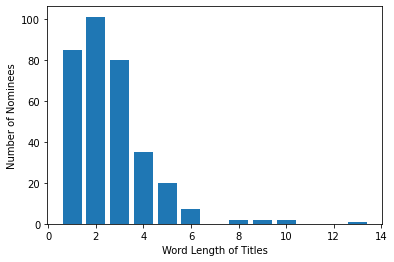

In [41]:
plt.bar(nominee_length['title_length'], nominee_length['nominee'])
plt.xlabel('Word Length of Titles')
plt.ylabel('Number of Nominees')

In [42]:
winners = title_length.query('winner==1')
winners.head()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross,title_length
4,Parasite,R,"Comedy, Drama, Thriller",Greed and class discrimination threaten the ne...,53367844.0,2019,Best Picture,Parasite,2020,1,Comedy,Drama,Thriller,132,2020,258.811167,258.811167,53367844.0,1.0
14,Green Book,PG-13,"Biography, Comedy, Drama",A working-class Italian-American bouncer becom...,85080171.0,2018,Best Picture,Green Book,2019,1,Biography,Comedy,Drama,130,2019,255.657417,258.811167,86129707.0,2.0
23,The Shape of Water,R,"Drama, Fantasy, Romance",At a top secret research facility in the 1960s...,63859435.0,2017,Best Picture,The Shape of Water,2018,1,Drama,Fantasy,Romance,123,2018,251.106833,258.811167,65818738.0,4.0
28,Moonlight,R,Drama,A young African-American man grapples with his...,27854932.0,2016,Best Picture,Moonlight,2017,1,Drama,NaN,NaN,111,2017,245.119583,258.811167,29410818.0,1.0
38,Spotlight,R,"Biography, Crime, Drama",The true story of how the Boston Globe uncover...,45055776.0,2015,Best Picture,Spotlight,2016,1,Biography,Crime,Drama,129,2016,240.007167,258.811167,48585791.0,1.0


In [43]:
winner_length = winners[['title_length', 'winner']].groupby('title_length').sum().sort_values('winner', ascending=False).reset_index()
winner_length

,title_length,winner
0,3.0,18
1,1.0,16
2,2.0,14
3,4.0,5
4,5.0,3
5,6.0,2
6,10.0,1


Text(0, 0.5, 'Number of Winners')

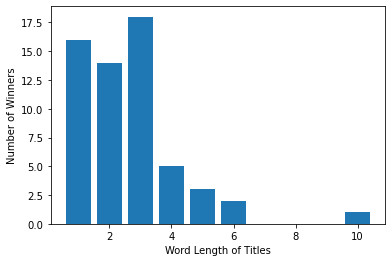

In [44]:
plt.bar(winner_length['title_length'], winner_length['winner'])
plt.xlabel('Word Length of Titles')
plt.ylabel('Number of Winners')

In [49]:
losers = title_length.query('winner==0')
losers.head()

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross,title_length
0,Jojo Rabbit,PG-13,"Comedy, Drama, War",A young German boy in the Hitler Youth whose h...,349555.0,2019,Best Picture,Jojo Rabbit,2020,0,Comedy,Drama,War,108,2020,258.811167,258.811167,349555.0,2.0
1,Sound of Metal,R,"Drama, Music",A heavy-metal drummer's life is thrown into fr...,516520.0,2019,Best Picture,Sound of Metal,2020,0,Drama,Music,NaN,120,2020,258.811167,258.811167,516520.0,3.0
2,Marriage Story,R,"Drama, Romance",Noah Baumbach's incisive and compassionate loo...,2000000.0,2019,Best Picture,Marriage Story,2020,0,Drama,Romance,NaN,137,2020,258.811167,258.811167,2000000.0,2.0
3,The Irishman,R,"Biography, Crime, Drama",Hitman Frank Sheeran looks back at the secrets...,7000000.0,2019,Best Picture,The Irishman,2020,0,Biography,Crime,Drama,209,2020,258.811167,258.811167,7000000.0,2.0
5,Little Women,PG,"Drama, Romance","Jo March reflects back and forth on her life, ...",108101214.0,2019,Best Picture,Little Women,2020,0,Drama,Romance,NaN,135,2020,258.811167,258.811167,108101214.0,2.0


In [50]:
loser_length = losers[['title_length', 'winner']].groupby('title_length').count().sort_values('winner', ascending=False).reset_index().rename(columns={'winner':'loser'})
loser_length

,title_length,loser
0,2.0,87
1,1.0,69
2,3.0,62
3,4.0,30
4,5.0,17
5,6.0,5
6,8.0,2
7,9.0,2
8,10.0,1
9,13.0,1


<BarContainer object of 10 artists>

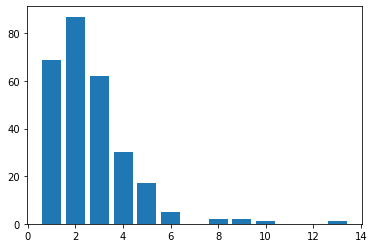

In [52]:
plt.bar(loser_length['title_length'], loser_length['loser'])

In [53]:
title_length.sort_values('title_length', ascending=False).head(10)

,title,rating,genre,summary,gross,release_year,category,nominee,oscar_year,winner,genre_1,genre_2,genre_3,runtime_min,Year,avg_cpi,cpi_2020,adjusted_gross,title_length
320,Dr. Strangelove or: How I Learned to Stop Worr...,PG,"Comedy, War",An insane American general orders a bombing at...,275902.0,1964,Best Picture,Dr. Strangelove or: How I Learned to Stop Worr...,1965,0,Comedy,War,NaN,95,1965,31.508333,258.811167,2266274.0,13.0
138,The Lord of the Rings: The Fellowship of the Ring,PG-13,"Action, Adventure, Drama",A meek Hobbit from the Shire and eight compani...,315544750.0,2001,Best Picture,The Lord of the Rings: The Fellowship of the Ring,2002,0,Action,Adventure,Drama,178,2002,179.875000,258.811167,454018096.0,10.0
128,The Lord of the Rings: The Return of the King,PG-13,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,377845905.0,2003,Best Picture,The Lord of the Rings: The Return of the King,2004,1,Action,Adventure,Drama,201,2004,188.883333,258.811167,517730908.0,10.0
126,Master and Commander: The Far Side of the World,PG-13,"Action, Adventure, Drama","During the Napoleonic Wars, a brash British ca...",93927920.0,2003,Best Picture,Master and Commander: The Far Side of the World,2004,0,Action,Adventure,Drama,138,2004,188.883333,258.811167,128701639.0,9.0
238,Indiana Jones and the Raiders of the Lost Ark,PG,"Action, Adventure",Archaeology professor Indiana Jones ventures t...,248159971.0,1981,Best Picture,Raiders of the Lost Ark,1982,0,Action,Adventure,NaN,115,1982,96.500000,258.811167,665560328.0,9.0
311,The Russians Are Coming the Russians Are Coming,Unrated,"Comedy, War","Without hostile intent, a Soviet submarine run...",21693114.0,1966,Best Picture,The Russians Are Coming The Russians Are Coming,1967,0,Comedy,War,NaN,126,1967,33.358333,258.811167,168306375.0,8.0
133,The Lord of the Rings: The Two Towers,PG-13,"Action, Adventure, Drama",While Frodo and Sam edge closer to Mordor with...,342551365.0,2002,Best Picture,The Lord of the Rings: The Two Towers,2003,0,Action,Adventure,Drama,179,2003,183.958333,258.811167,481935865.0,8.0
102,The Curious Case of Benjamin Button,PG-13,"Drama, Fantasy, Romance","Tells the story of Benjamin Button, a man who ...",127509326.0,2008,Best Picture,The Curious Case of Benjamin Button,2009,0,Drama,Fantasy,Romance,166,2009,214.537000,258.811167,153823524.0,6.0
306,In the Heat of the Night,Approved,"Drama, Mystery, Thriller",A black Philadelphia police detective is mista...,24379978.0,1967,Best Picture,In the Heat of the Night,1968,1,Drama,Mystery,Thriller,110,1968,34.783333,258.811167,181403274.0,6.0
175,In the Name of the Father,R,"Biography, Crime, Drama",A man's coerced confession to an I.R.A. bombin...,25010410.0,1993,Best Picture,In the Name of the Father,1994,0,Biography,Crime,Drama,133,1994,148.225000,258.811167,43669917.0,6.0


In [ ]:
#save for later
winners.to_csv('winners_adjusted.csv', index=False)

In [ ]:
#save for later
losers.to_csv('losers_adjusted.csv', index=False)

In [ ]:
#save for later
title_length.to_csv('length.csv', index=False)